In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [13]:
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 32
epochs = 30

In [14]:

data = tf.keras.utils.image_dataset_from_directory(directory="resizzed",
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None ,
                                                  color_mode='rgb',
                                                  image_size=input_shape_2D,
                                                  seed=seed)

Found 97 files belonging to 2 classes.


In [15]:
class_names = data.class_names
class_names

['Damage Belt', 'Normal Belt']

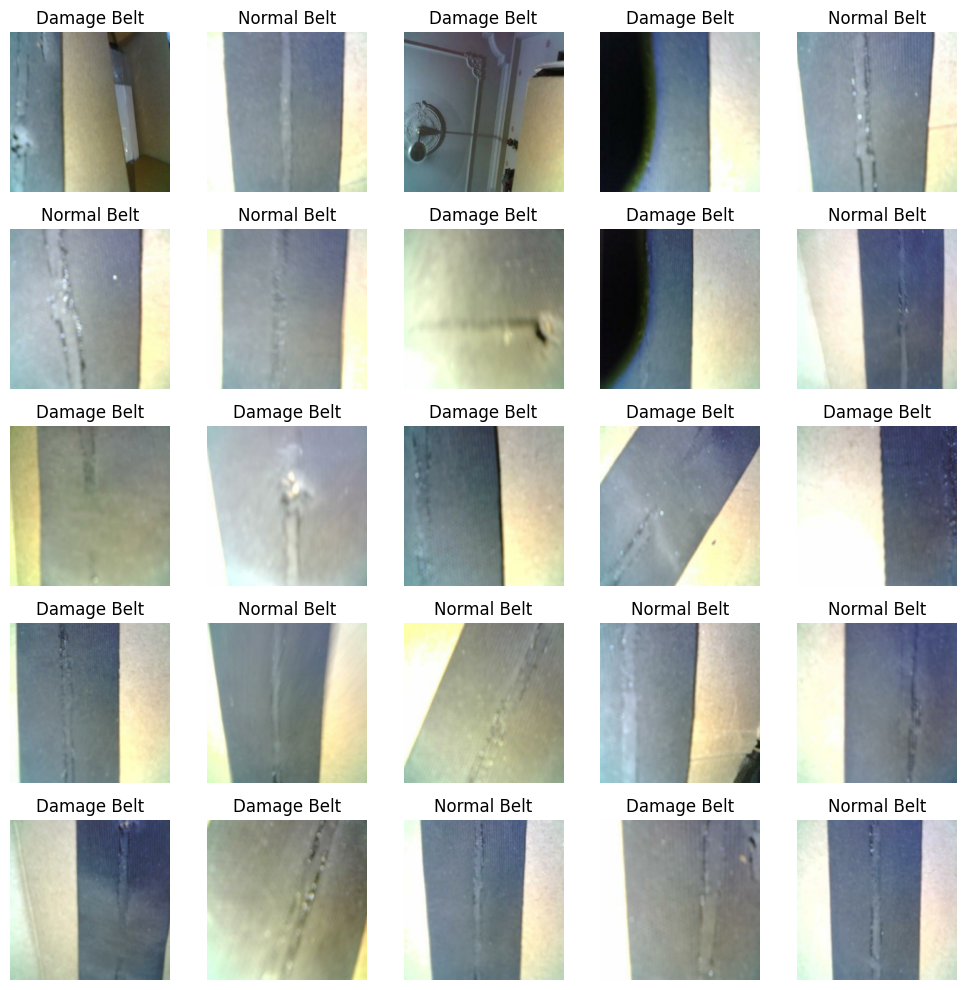

In [16]:
plt.figure(figsize=(10,10))
for images , labels in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

In [17]:

X = []
y = []

for images , labels in data:
    X.append(images.numpy())
    y.append(labels.numpy())

X = np.concatenate(X ,axis=0)
y = np.concatenate(y ,axis=0)

In [18]:
X

array([[[[214.9866  , 249.9866  , 217.154   ],
         [185.27307 , 220.60713 , 190.70016 ],
         [151.27281 , 186.3812  , 161.7567  ],
         ...,
         [215.00444 , 229.33037 , 203.1674  ],
         [214.1674  , 230.1674  , 203.1674  ],
         [214.1674  , 230.1674  , 203.1674  ]],

        [[216.90775 , 251.4896  , 218.657   ],
         [188.7009  , 223.4509  , 193.20535 ],
         [155.08258 , 190.00146 , 165.26712 ],
         ...,
         [216.67781 , 231.00374 , 204.84077 ],
         [215.      , 231.      , 204.      ],
         [215.      , 231.      , 204.      ]],

        [[219.94098 , 252.43428 , 221.13567 ],
         [194.63321 , 227.9591  , 197.80061 ],
         [162.79663 , 196.82318 , 171.28125 ],
         ...,
         [219.04881 , 233.10191 , 207.07536 ],
         [215.4204  , 230.5796  , 204.      ],
         [215.      , 231.      , 204.      ]],

        ...,

        [[211.97716 , 252.97716 , 194.37099 ],
         [213.25815 , 253.83777 , 193.83777 ]

In [19]:
X = X.astype('float32')/255

In [20]:
X_train, X_test = X[:77] ,X[20:]
y_train, y_test = y[:77] ,y[20:]

In [21]:
X_train.shape , X_test.shape

((77, 224, 224, 3), (77, 224, 224, 3))

In [22]:
dataset_length = len(X)


split_point = int(dataset_length * 0.8)

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]


print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_test: {len(y_test)}")


Length of X_train: 77
Length of X_test: 20
Length of y_train: 77
Length of y_test: 20


In [23]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train ,len(class_names))
y_test = to_categorical(y_test ,len(class_names))

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout

In [25]:
model = Sequential()
model.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=input_shape_3D))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))


model.summary()

C:\Users\Loges\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 32)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 250)            │       256,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,664 (2.57 MB)

 Trainable params: 673,664 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='Adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [27]:
from keras.callbacks import ModelCheckpoint
check_pointer = ModelCheckpoint(filepath='model.weights.best.keras' ,
                                save_best_only=False ,
                                mode='auto' ,
                                monitor='val_accuracy' )

In [28]:
history = model.fit(X_train,y_train,batch_size=32 ,epochs=63 ,validation_data=(X_test,y_test) ,callbacks=[check_pointer] ,verbose=1 ,shuffle=True)

Epoch 1/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 392ms/step - accuracy: 0.5227 - loss: 0.6938 - val_accuracy: 0.7000 - val_loss: 0.6407
Epoch 2/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.6814 - loss: 0.6669 - val_accuracy: 0.7000 - val_loss: 0.6535
Epoch 3/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.7360 - loss: 0.6353 - val_accuracy: 0.7000 - val_loss: 0.6258
Epoch 4/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.7243 - loss: 0.6032 - val_accuracy: 0.7000 - val_loss: 0.6268
Epoch 5/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.7048 - loss: 0.6259 - val_accuracy: 0.7000 - val_loss: 0.6288
Epoch 6/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.7165 - loss: 0.6100 - val_accuracy: 0.7000 - val_loss: 0.6294
Epoch 7/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.7087 - loss: 0.6254 - val_accuracy: 0.7000 - val_loss: 0.6186
Epoch 8/63
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.7204 - loss: 0.5964 - val_accuracy: 0.7000 - val_loss:

In [29]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Check for emptiness
if X_train.size == 0:
    print("X_train is empty.")
if y_train.size == 0:
    print("y_train is empty.")
if X_test.size == 0:
    print("X_test is empty.")
if y_test.size == 0:
    print("y_test is empty.")


X_train shape: (77, 224, 224, 3)
y_train shape: (77, 2)
X_test shape: (20, 224, 224, 3)
y_test shape: (20, 2)


In [30]:
y_prediction = model.predict(X_test)
leaf_class = ['Belt image', 'Damage belt image']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


In [31]:
predicted_classes = np.argmax(y_prediction, axis=1)
print(predicted_classes)

[0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1]


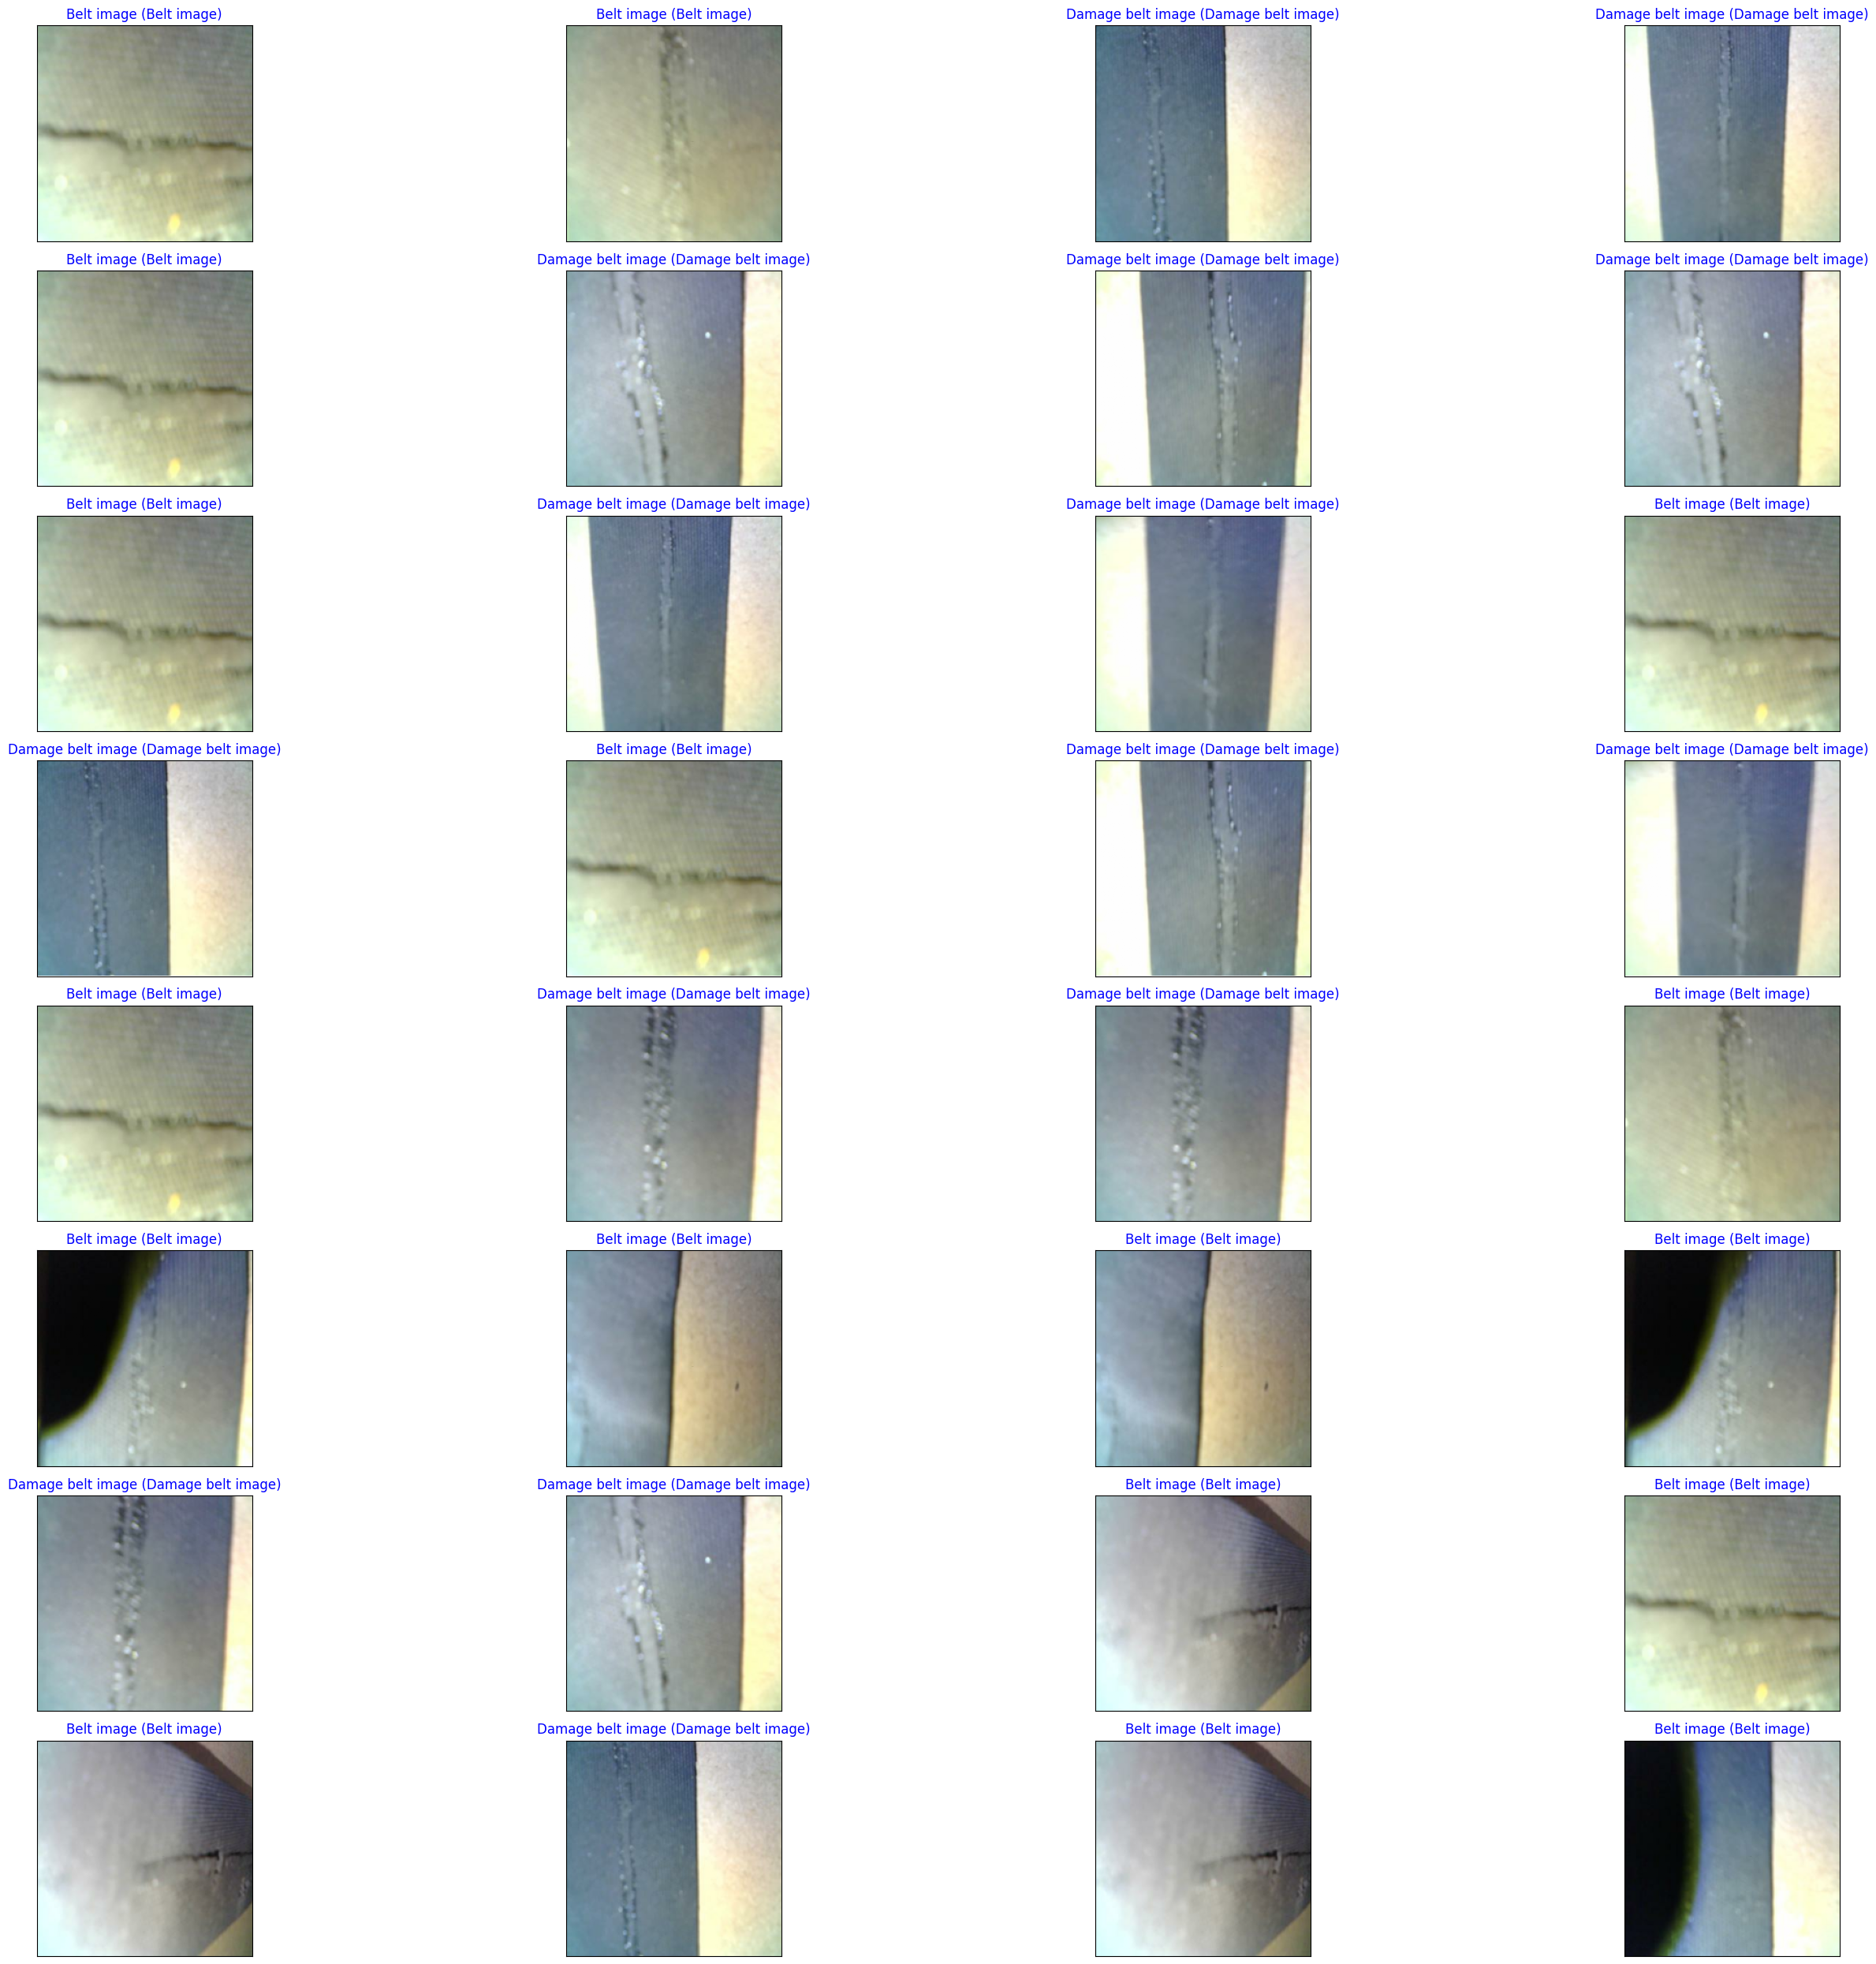

In [32]:
fig = plt.figure(figsize=(30, 25))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=True)):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    
    pred_idx = np.argmax(y_prediction[idx])
    
    true_idx = np.argmax(y_prediction[idx])
    
    ax.set_title("{} ({})".format(leaf_class[pred_idx], leaf_class[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

plt.tight_layout()


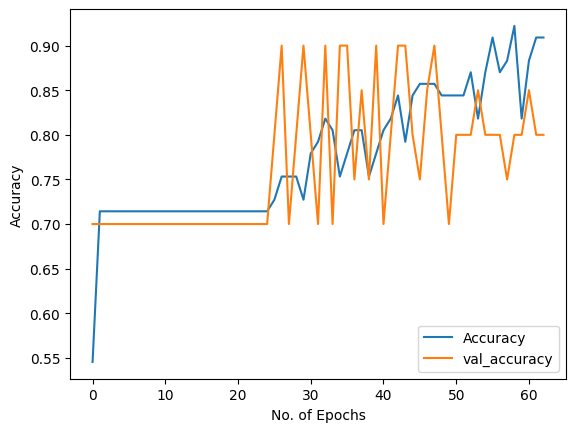

In [33]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

In [34]:
test_Accuracy = model.evaluate(X_test,y_test)
print(f"Model's Accuracy : {test_Accuracy[1]*100}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8000 - loss: 0.4606
Model's Accuracy : 80.0000011920929


                                        _______________________________ END ___________________________________